In [0]:
import cv2 as cv2
import os
import glob
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pandas as pd


In [4]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())
files=upload_files()  

Saving 108.jpg to 108.jpg
Saving 123.jpg to 123.jpg
Saving 124.jpg to 124.jpg
Saving 125.jpg to 125.jpg
Saving 126.jpg to 126.jpg
Saving 127.jpg to 127.jpg
Saving 128.jpg to 128.jpg
Saving 129.jpg to 129.jpg
Saving 130.jpg to 130.jpg
Saving 131.jpg to 131.jpg
Saving 132.jpg to 132.jpg
Saving 133.jpg to 133.jpg
Saving 134.jpg to 134.jpg
Saving 135.jpg to 135.jpg
Saving 136.jpg to 136.jpg
Saving 137.jpg to 137.jpg
Saving 138.jpg to 138.jpg
Saving 139.jpg to 139.jpg
Saving 140.jpg to 140.jpg
Saving 141.jpg to 141.jpg
Saving 142.jpg to 142.jpg
Saving 143.jpg to 143.jpg
Saving 144.jpg to 144.jpg
Saving 145.jpg to 145.jpg
Saving 146.jpg to 146.jpg
Saving 147.jpg to 147.jpg
Saving 148.jpg to 148.jpg
Saving 149.jpg to 149.jpg
Saving 150.jpg to 150.jpg
Saving 151.jpg to 151.jpg
Saving 152.jpg to 152.jpg
Saving 153.jpg to 153.jpg
Saving 154.jpg to 154.jpg
Saving 155.jpg to 155.jpg
Saving 156.jpg to 156.jpg
Saving 157.jpg to 157.jpg


In [5]:
files

['108.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg']

In [0]:
background_img=cv2.imread(files[0],0)

f_list = [] 
for f in range(1,len(files)):
    img = cv2.imread(files[f],0)
    f_list.append(img )  
    

In [7]:
print(files)

['108.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg']


In [8]:
difference=[]
for i in range(len(f_list)-1):
    diff=cv2.subtract( f_list[i],f_list[i+1])
    print(diff)
    difference.append(diff)
    



[[0 0 0 ... 5 5 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
[[6 5 0 ... 0 0 5]
 [0 0 4 ... 0 3 8]
 [0 0 2 ... 0 1 4]
 ...
 [2 2 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
[[0 0 0 ... 4 0 0]
 [0 0 0 ... 6 0 0]
 [1 0 0 ... 3 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 1 ... 6 6 0]
 [9 2 0 ... 5 6 2]
 [3 0 0 ... 4 5 3]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 5]
 [0 0 8 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 4 3 ... 5 7 7]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 4 7 8]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 2]
 [2 3 3 ... 3 6 8]
 [0 0 3 ... 0 0 0]
 ...
 [2 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 2 3 0]
 [8 3 0 ... 1 1 0]
 [3 0 0 ... 7 8 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[ 2  1  0 ...  0  0  4]
 [ 0  0  7 ... 

In [9]:
smooth_imgs=[]
for i in range(len(f_list)-1):
   d=cv2.GaussianBlur(difference[i],(5,5),0) 
   smooth_imgs.append(d)
cv2.waitKey(0)




-1

In [0]:
thresholded_imgs=[]
for i in range(len(f_list)-1):
    ret,thresh1 = cv2.threshold( smooth_imgs[i],50,255,cv2.THRESH_BINARY) 
    thresholded_imgs.append(thresh1) 


In [0]:
centroids=[]
for k in range(0,len(thresholded_imgs)):
    x=[]
    y=[]
    thresholded_imgs[k].tolist()
    for i in range(len(thresholded_imgs[k])):
       for j in range(len(thresholded_imgs[k][i])):
           if thresholded_imgs[k][i][j]==255:
              y.append(i)
              x.append(j)

    centroid=[int(round(sum(x)/len(x))),int(round(sum(y)/len(y)))]
    centroids.append(centroid)
          

In [12]:
print(centroids)

[[613, 369], [598, 366], [585, 361], [572, 357], [557, 353], [545, 349], [527, 345], [512, 340], [499, 337], [487, 333], [475, 331], [463, 328], [449, 324], [438, 321], [427, 317], [415, 313], [405, 311], [394, 307], [384, 304], [373, 300], [365, 297], [355, 294], [346, 290], [338, 287], [331, 282], [323, 279], [316, 275], [308, 272], [300, 269], [293, 265], [287, 263], [280, 260], [272, 258], [263, 253]]


In [13]:
import numpy as np
dt = 1                      
S_frame = 1                   
a = 0.005                   
Q_estimate= np.array([[centroids[1][0]],[centroids[1][1]], [0] ,[0]])   
HexAccel_noise_mag = 0.1      
tkn_x = 1                   
tkn_y = 1                    
Ez = np.array([[tkn_x,0] , [0,tkn_y]]) 
Ex = np.array([[dt**4/4, 0 ,dt**3/2 ,0],
              [0, dt**4/4, 0 ,dt**3/2], 
              [dt**3/2 ,0, dt**2, 0], 
              [0, dt**3/2, 0 ,dt**2]])   
P = Ex   
print(Q_estimate)

[[598]
 [366]
 [  0]
 [  0]]


In [0]:
A = np.array([[1, 0 ,dt, 0],[ 0 ,1, 0, dt],[ 0 ,0, 1, 0],[ 0, 0, 0, 1]])  
B = np.array([[(dt**2/2)], [(dt**2/2)], [dt],[ dt]])
C = np.array([[1 ,0, 0 ,0],[ 0 ,1 ,0 ,0]])                                  

In [0]:
Q_loc = [] 
vel = []   
Q_loc_meas = []  


Q_loc_estimate = []   
vel_estimate = []     
P_estimate = P
predic_state = []
predic_var = []

In [16]:
Q1=[]
for t in range(len(thresholded_imgs)):                                
    Q1.append([centroids[t][0] ,centroids[t][1]])
Q_loc_meas=np.asarray(Q1)
print(Q_loc_meas.shape)

(34, 2)


In [17]:
estimated_pos=[]  
for t in range(0,len(thresholded_imgs)):     
  Q_estimate= np.dot(A,Q_estimate) + B*a  
  P = np.dot(A,np.dot(P , np.transpose(A))) + Ex
  G=np.dot(C,np.dot(P,np.transpose(C)))+Ez
  K=np.dot(P,np.dot(np.transpose(C),np.linalg.inv(G))) 
  Q_estimate = Q_estimate + np.dot(K , (np.transpose([Q_loc_meas[t]])- np.dot(C,Q_estimate)))
  print("Estimated state vector={}".format(Q_estimate))

  I=np.identity(4)
  P=np.dot((I-np.dot(K,C)),P)
  print("Estimated state vector={}".format(P))

  Q_loc_estimate=[int(round(Q_estimate[0][0])),int(round(Q_estimate[1][0]))]        
  print("Estimated pos vector={}".format(Q_loc_estimate))
  estimated_pos.append(Q_loc_estimate)

    


  vel_estimate=np.array([[Q_estimate[2][0]],[Q_estimate[3][0]]])                   
  print("Estimated vel vector={}".format(vel_estimate))


Estimated state vector=[[608.715     ]
 [368.14357143]
 [  8.575     ]
 [  1.71785714]]
Estimated state vector=[[0.71428571 0.         0.57142857 0.        ]
 [0.         0.71428571 0.         0.57142857]
 [0.57142857 0.         0.85714286 0.        ]
 [0.         0.57142857 0.         0.85714286]]
Estimated pos vector=[609, 368]
Estimated vel vector=[[8.575     ]
 [1.71785714]]
Estimated state vector=[[ 6.02866577e+02]
 [ 3.66974685e+02]
 [-8.05540541e-01]
 [-1.56891892e-01]]
Estimated state vector=[[0.74774775 0.         0.48648649 0.        ]
 [0.         0.74774775 0.         0.48648649]
 [0.48648649 0.         0.91891892 0.        ]
 [0.         0.48648649 0.         0.91891892]]
Estimated pos vector=[603, 367]
Estimated vel vector=[[-0.80554054]
 [-0.15689189]]
Estimated state vector=[[589.38691951]
 [362.49635785]
 [ -9.15940069]
 [ -3.00306022]]
Estimated state vector=[[0.74290677 0.         0.48986682 0.        ]
 [0.         0.74290677 0.         0.48986682]
 [0.48986682 0.  

list

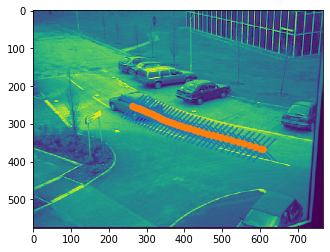

In [18]:
plt.imshow(img)
x = [0,2,4,6,8,10]
s = [20*26 for n in range(len(x))]
f = [20*2 for n in range(len(x))]
plt.scatter(*zip(*centroids),s,marker='x')
plt.scatter(*zip(*estimated_pos),f, marker='o')
plt.show()